# Quality Assessment


In [1]:
import pandas as pd

Load our cleaned DataFrames

In [2]:
orders_cl = pd.read_csv('3_Data_Cleaning/data/orders_df_cleaned.csv', parse_dates=['created_date'])
orders_df = orders_cl.copy()

In [3]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219781 entries, 0 to 219780
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      219781 non-null  int64         
 1   created_date  219781 non-null  datetime64[ns]
 2   total_paid    219781 non-null  float64       
 3   state         219781 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.7+ MB


In [4]:
orders_df.nunique()

order_id        219781
created_date    217819
total_paid       29967
state                5
dtype: int64

In [5]:
orderlines_cl = pd.read_csv('3_Data_Cleaning/data/orderlines_df_cleaned.csv',parse_dates=['date'])
orderlines_df = orderlines_cl.copy()

In [6]:
orderlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286643 entries, 0 to 286642
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                286643 non-null  int64         
 1   id_order          286643 non-null  int64         
 2   product_id        286643 non-null  int64         
 3   product_quantity  286643 non-null  int64         
 4   sku               286643 non-null  object        
 5   unit_price        286643 non-null  float64       
 6   date              286643 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 15.3+ MB


In [7]:
orderlines_df.nunique()

id                  286643
id_order            200378
product_id               1
product_quantity        66
sku                   7609
unit_price           11035
date                245079
dtype: int64

In [8]:
products_cl = pd.read_csv('3_Data_Cleaning/data/products_df_cleaned.csv')
products_df = products_cl.copy()

In [9]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          9992 non-null   object 
 1   name         9992 non-null   object 
 2   desc         9986 non-null   object 
 3   price        9992 non-null   float64
 4   promo_price  9992 non-null   object 
 5   in_stock     9992 non-null   int64  
 6   type         9946 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 546.6+ KB


In [10]:
products_df.nunique()

sku            9992
name           9836
desc           6763
price          2332
promo_price    4372
in_stock          2
type            125
dtype: int64

In [11]:
dropped_ids_df = pd.read_csv('3_Data_Cleaning/data/dropped_ids_df.csv')
dropped_ids_df

,id_order,reason
0,427314,"Missing column ""total_paid"" in orders_df dataset"
1,431655,"Missing column ""total_paid"" in orders_df dataset"
2,447411,"Missing column ""total_paid"" in orders_df dataset"
3,448966,"Missing column ""total_paid"" in orders_df dataset"
4,449596,"Missing column ""total_paid"" in orders_df dataset"
...,...,...
7247,526833,Corrupted decimal places in column 'price' in ...
7248,527147,Corrupted decimal places in column 'price' in ...
7249,527170,Corrupted decimal places in column 'price' in ...
7250,527191,Corrupted decimal places in column 'price' in ...


## 1.&nbsp; Define Pandas display format

In [12]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

## 2.&nbsp; Exclude unwanted orders

### orders –> Keep only orders with the states that you want to work with.

In [13]:
# Checking 'state' categories
orders_df['state'].value_counts()

state
Shopping Basket    113765
Completed           45260
Place Order         39988
Pending             13851
Cancelled            6917
Name: count, dtype: int64

Only **"Completed"** orders will be considered for the analysis (i.e., other states will be excluded).

### Removing Shopping Basket orders

In [14]:
shopping_basket_orders_mask = (orders_df['state'].isin(['Shopping Basket']))

In [15]:
shopping_basket_orders_df = orders_df.loc[shopping_basket_orders_mask ,:]
shopping_basket_orders_df

,order_id,created_date,total_paid,state
197,299539,2017-01-01 00:07:19,18.99,Shopping Basket
198,299540,2017-01-01 00:19:45,399.00,Shopping Basket
199,299541,2017-01-01 00:20:57,474.05,Shopping Basket
200,299542,2017-01-01 00:51:40,68.39,Shopping Basket
201,299543,2017-01-01 01:06:38,23.74,Shopping Basket
...,...,...,...,...
219772,527393,2018-03-14 13:53:57,13.99,Shopping Basket
219774,527395,2018-03-14 13:55:22,20.99,Shopping Basket
219777,527398,2018-03-14 13:57:25,42.99,Shopping Basket
219778,527399,2018-03-14 13:57:34,141.58,Shopping Basket


In [16]:
# Filtering the 'state' column to remove the 'Shopping Basket' orders
orders_df = orders_df.loc[~shopping_basket_orders_mask,:]
orders_df

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
219771,527392,2018-03-14 13:55:11,34.99,Pending
219773,527394,2018-03-14 13:55:15,161.00,Place Order
219775,527396,2018-03-14 13:55:44,141.58,Place Order
219776,527397,2018-03-14 13:56:38,42.99,Place Order


In [17]:
mask = orderlines_df['id_order'].isin(shopping_basket_orders_df['order_id'])

In [18]:
# Corresponding 'id_order' in orderlines table
orderlines_df.loc[mask,:]

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
286634,1650194,527395,0,1,MMW0030,20.99,2018-03-14 13:55:22
286638,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
286639,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
286640,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41


In [19]:
# Before dropping the rows, we will save the dropped id_orders to a new dataframe
dropped_ids_shopping_basket_orders_df = pd.DataFrame(orderlines_df.loc[mask, 'id_order']).copy().reset_index(drop=True)
dropped_ids_shopping_basket_orders_df['reason'] = "Shopping Basket status in 'state' colum in order_df dataset"  
dropped_ids_shopping_basket_orders_df = dropped_ids_shopping_basket_orders_df.drop_duplicates()
dropped_ids_shopping_basket_orders_df

,id_order,reason
0,299539,Shopping Basket status in 'state' colum in ord...
1,299540,Shopping Basket status in 'state' colum in ord...
2,299541,Shopping Basket status in 'state' colum in ord...
3,299542,Shopping Basket status in 'state' colum in ord...
4,299543,Shopping Basket status in 'state' colum in ord...
...,...,...
161825,527393,Shopping Basket status in 'state' colum in ord...
161826,527395,Shopping Basket status in 'state' colum in ord...
161827,527398,Shopping Basket status in 'state' colum in ord...
161828,527399,Shopping Basket status in 'state' colum in ord...


In [20]:
# Drop the rows from the orderlines_df
orderlines_df = orderlines_df[~mask].reset_index(drop=True)
orderlines_df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119114,295310,0,10,WDT0249,231.79,2017-01-01 01:14:27
1,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
2,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
3,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
4,1119126,299549,0,1,PAC0929,2565.99,2017-01-01 02:07:42
...,...,...,...,...,...,...,...
124807,1650193,527394,0,1,APP1922,161.00,2018-03-14 13:55:15
124808,1650195,527396,0,1,PAC0653,141.58,2018-03-14 13:55:44
124809,1650196,527384,0,1,LAC0227,249.99,2018-03-14 13:56:02
124810,1650198,527397,0,1,JBL0122,42.99,2018-03-14 13:56:38


### Removing Place Order orders

In [21]:
place_order_orders_mask = (orders_df['state'].isin(['Place Order']))

In [22]:
place_order_orders_df = orders_df.loc[place_order_orders_mask ,:]
place_order_orders_df

,order_id,created_date,total_paid,state
209,299553,2017-01-01 02:14:47,3278.99,Place Order
211,299555,2017-01-01 02:18:45,263.48,Place Order
235,299581,2017-01-01 08:52:28,757.77,Place Order
256,299602,2017-01-01 10:13:44,474.05,Place Order
260,299606,2017-01-01 10:40:34,429.00,Place Order
...,...,...,...,...
219765,527386,2018-03-14 13:49:48,161.00,Place Order
219773,527394,2018-03-14 13:55:15,161.00,Place Order
219775,527396,2018-03-14 13:55:44,141.58,Place Order
219776,527397,2018-03-14 13:56:38,42.99,Place Order


In [23]:
# Filtering the 'state' column to remove the 'Place Order' orders
orders_df = orders_df.loc[~place_order_orders_mask,:]
orders_df

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
219749,527370,2018-03-14 13:47:00,19.98,Pending
219752,527373,2018-03-14 13:44:45,31.38,Pending
219758,527379,2018-03-14 13:50:49,9.99,Pending
219770,527391,2018-03-14 13:57:54,54.98,Pending


In [24]:
mask = orderlines_df['id_order'].isin(place_order_orders_df['order_id'])
# Corresponding 'id_order' in orderlines table
orderlines_df.loc[mask,:]

,id,id_order,product_id,product_quantity,sku,unit_price,date
5,1119131,299553,0,1,APP1854,3278.99,2017-01-01 02:14:47
6,1119133,299555,0,1,BEA0065,256.49,2017-01-01 02:18:45
20,1119225,299602,0,1,PAR0071,474.05,2017-01-01 10:13:44
26,1119250,299606,0,1,APP1750,429.00,2017-01-01 10:41:11
33,1119259,299611,0,1,STM0093,39.99,2017-01-01 10:53:57
...,...,...,...,...,...,...,...
124807,1650193,527394,0,1,APP1922,161.00,2018-03-14 13:55:15
124808,1650195,527396,0,1,PAC0653,141.58,2018-03-14 13:55:44
124809,1650196,527384,0,1,LAC0227,249.99,2018-03-14 13:56:02
124810,1650198,527397,0,1,JBL0122,42.99,2018-03-14 13:56:38


In [25]:
# Before dropping the rows, we will save the dropped id_orders to a new dataframe
dropped_ids_place_order_orders_df = pd.DataFrame(orderlines_df.loc[mask, 'id_order']).copy().reset_index(drop=True)
dropped_ids_place_order_orders_df['reason'] = "Place Order status in 'state' colum in order_df dataset"  
dropped_ids_place_order_orders_df = dropped_ids_place_order_orders_df.drop_duplicates()
dropped_ids_place_order_orders_df

,id_order,reason
0,299553,Place Order status in 'state' colum in order_d...
1,299555,Place Order status in 'state' colum in order_d...
2,299602,Place Order status in 'state' colum in order_d...
3,299606,Place Order status in 'state' colum in order_d...
4,299611,Place Order status in 'state' colum in order_d...
...,...,...
33020,527394,Place Order status in 'state' colum in order_d...
33021,527396,Place Order status in 'state' colum in order_d...
33022,527384,Place Order status in 'state' colum in order_d...
33023,527397,Place Order status in 'state' colum in order_d...


In [26]:
# Drop the rows from the orderlines_df
orderlines_df = orderlines_df[~mask].reset_index(drop=True)
orderlines_df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119114,295310,0,10,WDT0249,231.79,2017-01-01 01:14:27
1,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
2,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
3,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
4,1119126,299549,0,1,PAC0929,2565.99,2017-01-01 02:07:42
...,...,...,...,...,...,...,...
91782,1650152,527370,0,2,APP0698,9.99,2018-03-14 13:40:36
91783,1650159,527373,0,1,OWC0014-A,31.38,2018-03-14 13:42:19
91784,1650172,527379,0,1,APP0698,9.99,2018-03-14 13:46:44
91785,1650189,527391,0,1,SAT0008,49.99,2018-03-14 13:53:31


### Removing Pending orders

In [27]:
pending_orders_mask = (orders_df['state'].isin(['Pending']))

In [28]:
pending_orders_df = orders_df.loc[pending_orders_mask ,:]
pending_orders_df

,order_id,created_date,total_paid,state
7,245851,2017-04-04 20:58:21,79.99,Pending
15,252371,2017-02-09 12:31:57,27.98,Pending
22,254537,2017-05-23 19:58:30,102.97,Pending
25,256434,2018-02-26 07:32:21,39.99,Pending
30,258087,2017-02-28 19:15:24,84.73,Pending
...,...,...,...,...
219749,527370,2018-03-14 13:47:00,19.98,Pending
219752,527373,2018-03-14 13:44:45,31.38,Pending
219758,527379,2018-03-14 13:50:49,9.99,Pending
219770,527391,2018-03-14 13:57:54,54.98,Pending


In [29]:
# Filtering the 'state' column to remove the 'Pending' orders
orders_df = orders_df.loc[~pending_orders_mask,:]
orders_df

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
219461,527074,2018-03-14 11:51:42,24.97,Completed
219483,527096,2018-03-14 11:58:40,34.96,Completed
219498,527112,2018-03-14 12:03:52,14.98,Completed
219622,527239,2018-03-14 12:43:33,3481.99,Cancelled


In [30]:
mask = orderlines_df['id_order'].isin(pending_orders_df['order_id'])
# Corresponding 'id_order' in orderlines table
orderlines_df.loc[mask,:]

,id,id_order,product_id,product_quantity,sku,unit_price,date
48,1119355,299654,0,1,DLK0029,146.29,2017-01-01 12:26:53
50,1119361,299654,0,1,BEL0266,23.74,2017-01-01 12:28:34
56,1119394,299654,0,1,KIN0137,5.69,2017-01-01 12:47:10
70,1119499,299716,0,2,FCM0026,56.99,2017-01-01 14:14:22
81,1119572,299761,0,1,SPE0133,35.14,2017-01-01 16:00:35
...,...,...,...,...,...,...,...
91782,1650152,527370,0,2,APP0698,9.99,2018-03-14 13:40:36
91783,1650159,527373,0,1,OWC0014-A,31.38,2018-03-14 13:42:19
91784,1650172,527379,0,1,APP0698,9.99,2018-03-14 13:46:44
91785,1650189,527391,0,1,SAT0008,49.99,2018-03-14 13:53:31


In [31]:
# Before dropping the rows, we will save the dropped id_orders to a new dataframe
dropped_ids_pending_orders_df = pd.DataFrame(orderlines_df.loc[mask, 'id_order']).copy().reset_index(drop=True)
dropped_ids_pending_orders_df['reason'] = "Pending status in 'state' colum in order_df dataset"  
dropped_ids_pending_orders_df = dropped_ids_pending_orders_df.drop_duplicates()
dropped_ids_pending_orders_df

,id_order,reason
0,299654,Pending status in 'state' colum in order_df da...
3,299716,Pending status in 'state' colum in order_df da...
4,299761,Pending status in 'state' colum in order_df da...
5,299875,Pending status in 'state' colum in order_df da...
6,299880,Pending status in 'state' colum in order_df da...
...,...,...
17736,527370,Pending status in 'state' colum in order_df da...
17737,527373,Pending status in 'state' colum in order_df da...
17738,527379,Pending status in 'state' colum in order_df da...
17739,527391,Pending status in 'state' colum in order_df da...


In [32]:
# Drop the rows from the orderlines_df
orderlines_df = orderlines_df[~mask].reset_index(drop=True)
orderlines_df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119114,295310,0,10,WDT0249,231.79,2017-01-01 01:14:27
1,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
2,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
3,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
4,1119126,299549,0,1,PAC0929,2565.99,2017-01-01 02:07:42
...,...,...,...,...,...,...,...
74041,1649780,527191,0,1,SYN0126,135.99,2018-03-14 12:24:22
74042,1649785,527191,0,1,WDT0311-A,132.51,2018-03-14 12:25:21
74043,1649853,527239,0,1,PAC2085,3475.00,2018-03-14 12:36:46
74044,1650009,527308,0,1,STA0016,9.99,2018-03-14 13:05:02


### Removing Cancelled orders

In [33]:
cancelled_orders_mask = (orders_df['state'].isin(['Cancelled']))

In [34]:
cancelled_orders_df = orders_df.loc[cancelled_orders_mask ,:]
cancelled_orders_df

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
4,243784,2017-11-24 13:35:19,157.86,Cancelled
73,274039,2017-11-24 13:17:19,489.78,Cancelled
86,280194,2017-07-27 16:56:25,5913.94,Cancelled
94,282624,2017-05-23 12:07:42,1598.00,Cancelled
...,...,...,...,...
219004,526604,2018-03-13 19:12:10,799.99,Cancelled
219080,526686,2018-03-13 22:02:30,1105.99,Cancelled
219108,526714,2018-03-13 23:18:22,2874.99,Cancelled
219622,527239,2018-03-14 12:43:33,3481.99,Cancelled


In [35]:
# Filtering the 'state' column to remove the 'Cancelled' orders
orders_df = orders_df.loc[~cancelled_orders_mask,:]
orders_df


,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
219429,527042,2018-03-14 11:47:50,18.98,Completed
219457,527070,2018-03-14 11:50:48,24.97,Completed
219461,527074,2018-03-14 11:51:42,24.97,Completed
219483,527096,2018-03-14 11:58:40,34.96,Completed


In [36]:
mask = orderlines_df['id_order'].isin(cancelled_orders_df['order_id'])
# Corresponding 'id_order' in orderlines table
orderlines_df.loc[mask,:]

,id,id_order,product_id,product_quantity,sku,unit_price,date
12,1119195,299582,0,1,PAC0961,2616.99,2017-01-01 08:54:00
16,1119220,299599,0,1,BEL0270,90.24,2017-01-01 10:02:14
31,1119278,299619,0,1,LGE0053,607.05,2017-01-01 11:18:26
36,1119303,299632,0,1,APP1269,2172.99,2017-01-01 11:46:18
38,1119312,298676,0,1,BLM0016,119.69,2017-01-01 11:55:44
...,...,...,...,...,...,...,...
73969,1648799,526686,0,1,APP2489,1099.00,2018-03-13 21:53:02
73972,1648850,526714,0,1,APP2205,2868.00,2018-03-13 23:03:05
74043,1649853,527239,0,1,PAC2085,3475.00,2018-03-14 12:36:46
74044,1650009,527308,0,1,STA0016,9.99,2018-03-14 13:05:02


In [37]:
# Before dropping the rows, we will save the dropped id_orders to a new dataframe
dropped_ids_cancelled_orders_df = pd.DataFrame(orderlines_df.loc[mask, 'id_order']).copy().reset_index(drop=True)
dropped_ids_cancelled_orders_df['reason'] = "Cancelled status in 'state' colum in order_df dataset"  
dropped_ids_cancelled_orders_df = dropped_ids_cancelled_orders_df.drop_duplicates()
dropped_ids_cancelled_orders_df

,id_order,reason
0,299582,Cancelled status in 'state' colum in order_df ...
1,299599,Cancelled status in 'state' colum in order_df ...
2,299619,Cancelled status in 'state' colum in order_df ...
3,299632,Cancelled status in 'state' colum in order_df ...
4,298676,Cancelled status in 'state' colum in order_df ...
...,...,...
8565,526604,Cancelled status in 'state' colum in order_df ...
8566,526686,Cancelled status in 'state' colum in order_df ...
8567,526714,Cancelled status in 'state' colum in order_df ...
8568,527239,Cancelled status in 'state' colum in order_df ...


In [38]:
# Drop the rows from the orderlines_df
orderlines_df = orderlines_df[~mask].reset_index(drop=True)
orderlines_df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119114,295310,0,10,WDT0249,231.79,2017-01-01 01:14:27
1,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
2,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
3,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
4,1119126,299549,0,1,PAC0929,2565.99,2017-01-01 02:07:42
...,...,...,...,...,...,...,...
65470,1649593,527112,0,1,APP0698,9.99,2018-03-14 11:58:13
65471,1649623,526749,0,1,SPE0189,36.99,2018-03-14 12:00:56
65472,1649711,527170,0,1,SAM0069,130.50,2018-03-14 12:13:46
65473,1649780,527191,0,1,SYN0126,135.99,2018-03-14 12:24:22


### orderlines –> Keep only orders present in orders.

In [39]:
mask_not_in_orders = ~(orderlines_df['id_order'].isin(orders_df['order_id']))

In [40]:
# id_orders NOT present in the orders table
order_id_not_in_orders_df = orderlines_df.loc[mask_not_in_orders,['id_order']].drop_duplicates().reset_index(drop=True)
order_id_not_in_orders_df

,id_order
0,295310
1,296284
2,294806
3,297261
4,298750
...,...
2805,526723
2806,526844
2807,526749
2808,527170


In [41]:
# Corresponding 'id_order' in orderlines table
orderlines_df.loc[mask_not_in_orders,:]

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119114,295310,0,10,WDT0249,231.79,2017-01-01 01:14:27
14,1119218,296284,0,1,BNQ0042,699.00,2017-01-01 09:58:35
15,1119223,294806,0,1,APP1849,2558.99,2017-01-01 10:09:15
16,1119226,294806,0,1,APP1864,2797.99,2017-01-01 10:15:14
17,1119235,297261,0,1,QNA0177,304.99,2017-01-01 10:17:59
...,...,...,...,...,...,...,...
65418,1649105,526844,0,1,APP0663,199.00,2018-03-14 10:39:07
65471,1649623,526749,0,1,SPE0189,36.99,2018-03-14 12:00:56
65472,1649711,527170,0,1,SAM0069,130.50,2018-03-14 12:13:46
65473,1649780,527191,0,1,SYN0126,135.99,2018-03-14 12:24:22


In [42]:
# Before dropping the rows, we will save the dropped id_orders to a new dataframe
dropped_ids_not_in_orders_df = pd.DataFrame(orderlines_df.loc[mask_not_in_orders, 'id_order']).copy().reset_index(drop=True)
dropped_ids_not_in_orders_df['reason'] = "Key value 'id_order' is not present in orders_df dataset"
dropped_ids_not_in_orders_df = dropped_ids_not_in_orders_df.drop_duplicates()
dropped_ids_not_in_orders_df

,id_order,reason
0,295310,Key value 'id_order' is not present in orders_...
1,296284,Key value 'id_order' is not present in orders_...
2,294806,Key value 'id_order' is not present in orders_...
4,297261,Key value 'id_order' is not present in orders_...
7,298750,Key value 'id_order' is not present in orders_...
...,...,...
5735,526723,Key value 'id_order' is not present in orders_...
5739,526844,Key value 'id_order' is not present in orders_...
5742,526749,Key value 'id_order' is not present in orders_...
5743,527170,Key value 'id_order' is not present in orders_...


In [43]:
# Drop the rows from the orderlines_df
orderlines_df = orderlines_df[~mask_not_in_orders].reset_index(drop=True)
orderlines_df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
3,1119126,299549,0,1,PAC0929,2565.99,2017-01-01 02:07:42
4,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
...,...,...,...,...,...,...,...
59724,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05
59725,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01
59726,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36
59727,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35


### orders –> Keep only orders present in orderlines.

In [44]:
mask_not_in_orderlines = ~(orders_df['order_id'].isin(orderlines_df['id_order']))

In [45]:
# order_ids NOT present in the orderlines table
orders_df.loc[mask_not_in_orderlines,:].reset_index(drop=True)

,order_id,created_date,total_paid,state
0,245941,2017-01-01 10:32:23,183.52,Completed
1,268629,2017-01-31 11:27:25,73.23,Completed
2,277994,2017-01-23 18:30:11,52.99,Completed
3,282180,2018-01-06 16:28:49,59.99,Completed
4,284200,2017-01-17 13:43:48,49.94,Completed
5,287780,2017-01-01 21:32:41,94.23,Completed
6,290018,2017-01-05 15:07:06,819.99,Completed
7,290223,2017-01-12 12:16:07,171.98,Completed
8,290487,2017-01-08 23:04:13,19.97,Completed
9,291378,2017-01-06 12:15:18,34.97,Completed


In [46]:
orders_df = orders_df.loc[~mask_not_in_orderlines,:].reset_index(drop=True)
orders_df 

,order_id,created_date,total_paid,state
0,241423,2017-11-06 13:10:02,136.15,Completed
1,242832,2017-12-31 17:40:03,15.76,Completed
2,243330,2017-02-16 10:59:38,84.98,Completed
3,245275,2017-06-28 11:35:37,149.00,Completed
4,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
45210,527042,2018-03-14 11:47:50,18.98,Completed
45211,527070,2018-03-14 11:50:48,24.97,Completed
45212,527074,2018-03-14 11:51:42,24.97,Completed
45213,527096,2018-03-14 11:58:40,34.96,Completed


In [47]:
orderlines_df['id_order'].nunique()

45215

In [48]:
orders_df['order_id'].nunique()

45215

## 3.&nbsp; Exclude orders with unknown products


In [49]:
mask_sku_not_in_products = ~(orderlines_df['sku'].isin(products_df['sku']))

In [50]:
# id_orders of products NOT present in the products table
order_sku_not_in_products_df = orderlines_df.loc[mask_sku_not_in_products,['id_order']].drop_duplicates().reset_index(drop=True)
order_sku_not_in_products_df

,id_order
0,299638
1,299706
2,299712
3,300029
4,300251
5,300340
6,300558
7,301178
8,301232
9,301386


In [51]:
# Corresponding 'id_order' in orderlines table
orderlines_df.loc[mask_sku_not_in_products,:]

,id,id_order,product_id,product_quantity,sku,unit_price,date
28,1119316,299638,0,1,SYN0127,223.24,2017-01-01 11:56:18
47,1119477,299706,0,1,EVU0007,28.49,2017-01-01 13:57:16
50,1119494,299712,0,1,APP0608,279.99,2017-01-01 14:10:47
119,1120084,300029,0,1,SYN0127,223.24,2017-01-01 22:00:19
185,1120534,300251,0,1,APP0608,279.99,2017-01-02 07:48:49
223,1120742,300340,0,1,APP0607,279.99,2017-01-02 10:37:25
329,1121348,300558,0,1,APP0608,279.99,2017-01-02 13:46:20
537,1122697,301178,0,1,APP0608,279.99,2017-01-02 23:48:55
563,1122861,301232,0,1,SYN0127,234.99,2017-01-03 01:23:09
613,1123130,301386,0,1,PAC1155,418.99,2017-01-03 10:43:19


In [52]:
# Before dropping the rows, we will save the dropped id_orders to a new dataframe
dropped_ids_sku_not_in_products_df = pd.DataFrame(orderlines_df.loc[mask_sku_not_in_products, 'id_order']).copy().reset_index(drop=True)
dropped_ids_sku_not_in_products_df['reason'] = "Key value 'sku' is not present in products_df dataset"
dropped_ids_sku_not_in_products_df = dropped_ids_sku_not_in_products_df.drop_duplicates()
dropped_ids_sku_not_in_products_df

,id_order,reason
0,299638,Key value 'sku' is not present in products_df ...
1,299706,Key value 'sku' is not present in products_df ...
2,299712,Key value 'sku' is not present in products_df ...
3,300029,Key value 'sku' is not present in products_df ...
4,300251,Key value 'sku' is not present in products_df ...
5,300340,Key value 'sku' is not present in products_df ...
6,300558,Key value 'sku' is not present in products_df ...
7,301178,Key value 'sku' is not present in products_df ...
8,301232,Key value 'sku' is not present in products_df ...
9,301386,Key value 'sku' is not present in products_df ...


In [53]:
# Remove rows from orderlines_df
mask = orderlines_df['id_order'].isin(order_sku_not_in_products_df['id_order'])

In [54]:
# Drop the rows from the orderlines_df
orderlines_df = orderlines_df.loc[~mask,:].reset_index(drop=True)
orderlines_df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
3,1119126,299549,0,1,PAC0929,2565.99,2017-01-01 02:07:42
4,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
...,...,...,...,...,...,...,...
59068,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05
59069,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01
59070,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36
59071,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35


In [55]:
# Remove rows from orders_df
mask = orders_df['order_id'].isin(order_sku_not_in_products_df['id_order'])

In [56]:
# Corresponding 'order_id' in orders table
orders_df.loc[mask,:]

,order_id,created_date,total_paid,state
25,258985,2017-07-31 12:52:38,2264.60,Completed
48,268659,2017-01-20 16:19:32,279.99,Completed
70,285098,2017-07-25 22:17:09,3047.60,Completed
144,299638,2017-01-01 12:02:15,380.22,Completed
158,299706,2017-01-01 14:04:18,40.48,Completed
160,299712,2017-01-01 14:13:00,283.98,Completed
219,300029,2017-01-01 22:14:34,325.12,Completed
261,300251,2017-01-02 07:55:42,279.99,Completed
293,300340,2017-01-02 10:49:45,279.99,Completed
371,300558,2017-01-02 13:51:09,279.99,Completed


In [57]:
orders_df = orders_df.loc[~mask,:].reset_index(drop=True)
orders_df 

,order_id,created_date,total_paid,state
0,241423,2017-11-06 13:10:02,136.15,Completed
1,242832,2017-12-31 17:40:03,15.76,Completed
2,243330,2017-02-16 10:59:38,84.98,Completed
3,245275,2017-06-28 11:35:37,149.00,Completed
4,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
44860,527042,2018-03-14 11:47:50,18.98,Completed
44861,527070,2018-03-14 11:50:48,24.97,Completed
44862,527074,2018-03-14 11:51:42,24.97,Completed
44863,527096,2018-03-14 11:58:40,34.96,Completed


In [58]:
orderlines_df['id_order'].nunique()

44865

In [59]:
orders_df['order_id'].nunique()

44865

## 4.&nbsp; Explore the revenue from different tables

#### Step 1:
Create the `unit_price_total` as `orderlines.unit_price` * `orderlines.product_quantity`

In [60]:
# Create a new column 'unit_price_total' by multiplying 'unit_price' with 'product_quantity'.
orderlines_df['unit_price_total'] = orderlines_df['unit_price'] * orderlines_df['product_quantity'] 
orderlines_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19
3,1119126,299549,0,1,PAC0929,2565.99,2017-01-01 02:07:42,2565.99
4,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
...,...,...,...,...,...,...,...,...
59068,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,16.52
59069,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
59070,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
59071,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97


#### Step 2:
Group by `id_order`, summarising by the sum of `unit_price_total`

In [61]:
# Group by 'id_order' and calculate the sum
unit_price_total_by_oder_df = orderlines_df.groupby('id_order')['unit_price_total'].sum().reset_index()
unit_price_total_by_oder_df

,id_order,unit_price_total
0,241423,129.16
1,242832,10.77
2,243330,77.99
3,245275,149.00
4,245595,105.98
...,...,...
44860,527042,13.99
44861,527070,19.98
44862,527074,19.98
44863,527096,29.97


### What is the average difference between `total_paid` and `unit_price_total`?

In [62]:
# Merge `orders` and `unit_price_total_by_oder_df`
orders_merged_df = orders_df.merge(unit_price_total_by_oder_df, left_on='order_id', right_on='id_order', how='left')
orders_merged_df

,order_id,created_date,total_paid,state,id_order,unit_price_total
0,241423,2017-11-06 13:10:02,136.15,Completed,241423,129.16
1,242832,2017-12-31 17:40:03,15.76,Completed,242832,10.77
2,243330,2017-02-16 10:59:38,84.98,Completed,243330,77.99
3,245275,2017-06-28 11:35:37,149.00,Completed,245275,149.00
4,245595,2017-01-21 12:52:47,112.97,Completed,245595,105.98
...,...,...,...,...,...,...
44860,527042,2018-03-14 11:47:50,18.98,Completed,527042,13.99
44861,527070,2018-03-14 11:50:48,24.97,Completed,527070,19.98
44862,527074,2018-03-14 11:51:42,24.97,Completed,527074,19.98
44863,527096,2018-03-14 11:58:40,34.96,Completed,527096,29.97


In [63]:
# Calculate the difference between 'total_paid' and 'unit_price_total'
orders_merged_df['paid_difference'] = orders_merged_df['total_paid'] - orders_merged_df['unit_price_total']
orders_merged_df

,order_id,created_date,total_paid,state,id_order,unit_price_total,paid_difference
0,241423,2017-11-06 13:10:02,136.15,Completed,241423,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,242832,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,243330,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,Completed,245275,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,Completed,245595,105.98,6.99
...,...,...,...,...,...,...,...
44860,527042,2018-03-14 11:47:50,18.98,Completed,527042,13.99,4.99
44861,527070,2018-03-14 11:50:48,24.97,Completed,527070,19.98,4.99
44862,527074,2018-03-14 11:51:42,24.97,Completed,527074,19.98,4.99
44863,527096,2018-03-14 11:58:40,34.96,Completed,527096,29.97,4.99


In [64]:
# Calculate the average difference between 'total_paid' and 'unit_price_total'
orders_merged_df['paid_difference'].mean()

np.float64(4.276895575615736)

### What is the distribution of these differences?

In [65]:
# Show the distribution of 'paid_difference'
orders_merged_df['paid_difference'].describe()

count   44865.00
mean        4.28
std        25.17
min      -165.00
25%         0.00
50%         4.99
75%         6.99
max      3984.99
Name: paid_difference, dtype: float64

<Axes: >

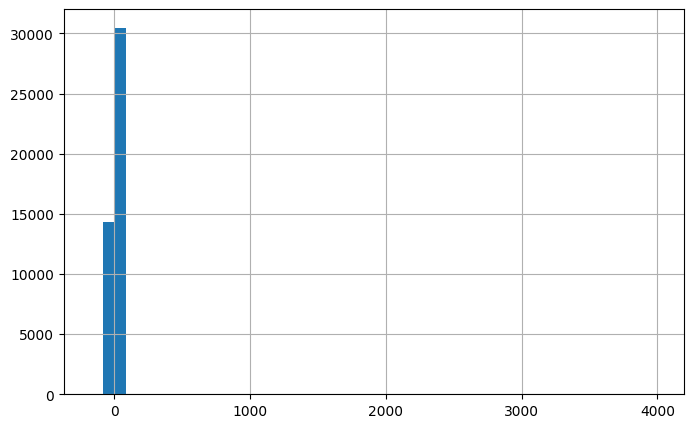

In [66]:
# Plot the histogram of 'paid_difference'
orders_merged_df['paid_difference'].hist(bins=50, figsize=(8, 5))

It is not possible to clearly see the distribution of 'paid_difference' in the histogram due to presence of outliers in the data.

### Can all the differences be explained by shipping costs? If not, what are other plausible explanations?

In [67]:
# paid_difference values greater than 200
orders_merged_df.loc[orders_merged_df['paid_difference']>=200,:]

,order_id,created_date,total_paid,state,id_order,unit_price_total,paid_difference
86,293308,2017-01-01 13:33:43,2635.47,Completed,293308,66.49,2568.98
103,297148,2017-01-01 16:42:24,4069.54,Completed,297148,84.55,3984.99
41165,508825,2018-02-16 11:21:44,2590.18,Completed,508825,1291.60,1298.58
41330,509673,2018-02-17 16:25:44,2708.97,Completed,509673,2408.99,299.98
41922,512146,2018-02-15 17:32:17,632.98,Completed,512146,313.00,319.98
42114,512894,2018-02-16 13:25:30,3356.18,Completed,512894,1674.60,1681.58
42131,512969,2018-02-16 15:48:22,376.96,Completed,512969,123.99,252.97
42142,513009,2018-02-16 17:33:09,406.80,Completed,513009,20.00,386.80
42147,513049,2018-02-16 19:03:22,504.98,Completed,513049,249.00,255.98
42191,513298,2018-02-17 12:13:00,317.51,Completed,513298,77.64,239.87


In [68]:
# paid_difference values less than zero (negative)
orders_merged_df.loc[orders_merged_df['paid_difference']<0,:]

,order_id,created_date,total_paid,state,id_order,unit_price_total,paid_difference
31,261978,2017-01-10 00:19:44,109.98,Completed,261978,109.99,-0.01
49,269440,2017-01-18 19:15:00,213.98,Completed,269440,213.98,-0.00
51,274043,2017-01-02 16:33:47,3.98,Completed,274043,24.99,-21.01
57,279755,2017-01-08 22:25:24,2616.99,Completed,279755,2621.99,-5.00
58,279891,2017-01-16 22:59:07,64.99,Completed,279891,69.99,-5.00
62,281302,2017-01-13 19:21:52,16.98,Completed,281302,29.99,-13.01
73,287311,2017-01-29 22:56:57,54.99,Completed,287311,59.99,-5.00
79,289685,2017-01-09 23:15:07,15.95,Completed,289685,135.97,-120.02
93,296010,2017-01-09 23:47:00,0.00,Completed,296010,24.99,-24.99
101,296847,2017-01-15 18:31:58,30.97,Completed,296847,51.98,-21.01


Not all differences can be explained by shipping costs.

### If there are differences that you can’t explain: what should you do with these orders?

Perform statistical analysis. Remove outliers.


Definition of outliers, values:
- lower than the 25% quartile - (1.5 IQR)
- higher than the 75% quartile + (1.5 IQR)

In [69]:
import matplotlib.pyplot as plt

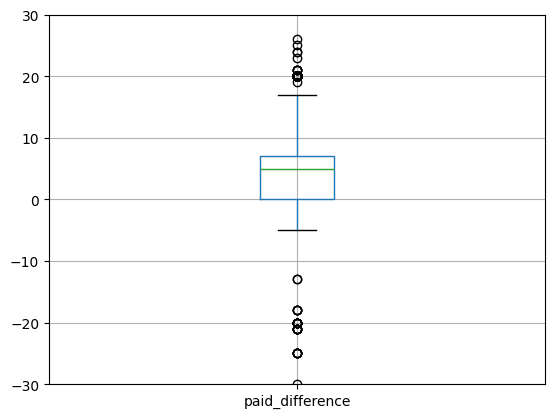

In [70]:
ax = orders_merged_df.boxplot(column=['paid_difference']);
ax.set_ylim(-30, 30)
plt.show()

In [71]:
# Calculate the quartiles
Q1 = orders_merged_df['paid_difference'].quantile(0.25)
Q3 = orders_merged_df['paid_difference'].quantile(0.75)

# Calculate the interquartile range
IQR = Q3 - Q1

print('Q1: ', Q1)
print('Q3: ', Q3)
print('IQR: ', IQR)

Q1:  0.0
Q3:  6.989999999999981
IQR:  6.989999999999981


In [72]:
# lower boundary
Q1 - 1.5 * IQR

np.float64(-10.484999999999971)

In [73]:
# upper boundary
Q3 + 1.5 * IQR

np.float64(17.47499999999995)

In [74]:
# Filter the dataframe to include only "non-outliers"
orders_merged_no_outliers_df = orders_merged_df.loc[(orders_merged_df['paid_difference'] >= (Q1 - 1.5 * IQR))
    & (orders_merged_df['paid_difference'] <= (Q3 + 1.5 * IQR))
    , :]

orders_merged_no_outliers_df

,order_id,created_date,total_paid,state,id_order,unit_price_total,paid_difference
0,241423,2017-11-06 13:10:02,136.15,Completed,241423,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,242832,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,243330,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,Completed,245275,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,Completed,245595,105.98,6.99
...,...,...,...,...,...,...,...
44860,527042,2018-03-14 11:47:50,18.98,Completed,527042,13.99,4.99
44861,527070,2018-03-14 11:50:48,24.97,Completed,527070,19.98,4.99
44862,527074,2018-03-14 11:51:42,24.97,Completed,527074,19.98,4.99
44863,527096,2018-03-14 11:58:40,34.96,Completed,527096,29.97,4.99


In [75]:
# Show the distribution of 'paid_difference'
orders_merged_no_outliers_df['paid_difference'].describe()

count   44145.00
mean        3.77
std         2.91
min        -5.00
25%         0.00
50%         4.99
75%         6.99
max        16.97
Name: paid_difference, dtype: float64

<Axes: >

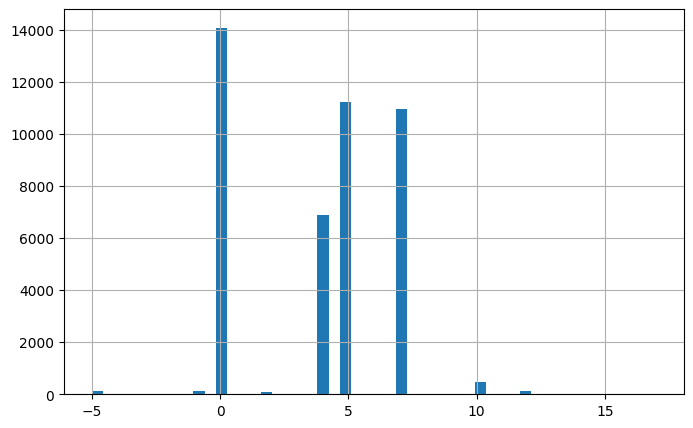

In [76]:
# Plot the histogram of 'paid_difference'
orders_merged_no_outliers_df['paid_difference'].hist(bins=50, figsize=(8, 5))

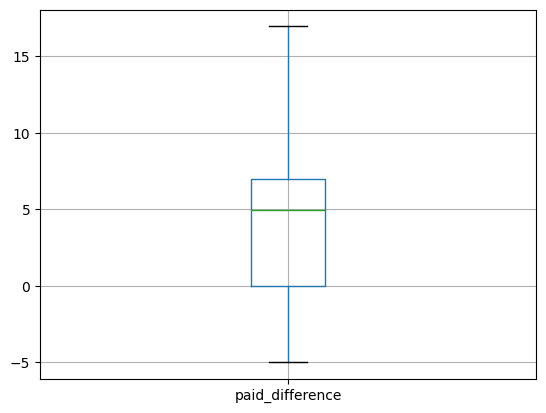

In [77]:
ax = orders_merged_no_outliers_df.boxplot(column=['paid_difference']);
#ax.set_ylim(-30, 30)
plt.show()

Now we need to drop the identified "outlier" orders from the orderlines and orders dataframes.

In [78]:
orderlines_qc_df = orderlines_df.loc[orderlines_df['id_order'].isin(orders_merged_no_outliers_df['id_order']),:]
orderlines_qc_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19
3,1119126,299549,0,1,PAC0929,2565.99,2017-01-01 02:07:42,2565.99
4,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
...,...,...,...,...,...,...,...,...
59066,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,9.99
59069,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
59070,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
59071,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97


In [79]:
orders_qc_df = orders_df.loc[orders_df['order_id'].isin(orders_merged_no_outliers_df['order_id']),:]
orders_qc_df

,order_id,created_date,total_paid,state
0,241423,2017-11-06 13:10:02,136.15,Completed
1,242832,2017-12-31 17:40:03,15.76,Completed
2,243330,2017-02-16 10:59:38,84.98,Completed
3,245275,2017-06-28 11:35:37,149.00,Completed
4,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
44860,527042,2018-03-14 11:47:50,18.98,Completed
44861,527070,2018-03-14 11:50:48,24.97,Completed
44862,527074,2018-03-14 11:51:42,24.97,Completed
44863,527096,2018-03-14 11:58:40,34.96,Completed


In [80]:
orderlines_qc_df['id_order'].nunique()

44145

In [81]:
orders_qc_df['order_id'].nunique()

44145

### Update the drop_id's dataframe.

In [82]:
orders_merged_outliers_df = orders_merged_df.loc[(orders_merged_df['paid_difference'] < (Q1 - 1.5 * IQR))
    | (orders_merged_df['paid_difference'] > (Q3 + 1.5 * IQR))
    , :]

orders_merged_outliers_df

,order_id,created_date,total_paid,state,id_order,unit_price_total,paid_difference
5,246405,2017-11-24 10:01:27,407.96,Completed,246405,275.75,132.21
10,251969,2017-11-21 21:04:12,610.07,Completed,251969,590.08,19.99
12,253306,2017-10-04 14:14:45,497.68,Completed,253306,477.68,20.00
37,264244,2018-01-29 15:33:06,141.97,Completed,264244,69.99,71.98
42,267014,2017-11-22 12:00:54,302.39,Completed,267014,282.40,19.99
47,268700,2017-05-10 16:43:17,407.59,Completed,268700,387.60,19.99
48,269083,2017-12-01 23:52:02,139.27,Completed,269083,84.28,54.99
51,274043,2017-01-02 16:33:47,3.98,Completed,274043,24.99,-21.01
62,281302,2017-01-13 19:21:52,16.98,Completed,281302,29.99,-13.01
68,285115,2017-11-27 20:57:28,120.73,Completed,285115,100.74,19.99


In [83]:
pd.DataFrame(orders_merged_outliers_df.loc[:, 'id_order']).copy().reset_index(drop=True)

,id_order
0,246405
1,251969
2,253306
3,264244
4,267014
5,268700
6,269083
7,274043
8,281302
9,285115


In [84]:
# We will save the dropped id_orders to a new dataframe
dropped_ids_outliers_df = pd.DataFrame(orders_merged_outliers_df.loc[:, 'id_order']).copy().reset_index(drop=True)
dropped_ids_outliers_df['reason'] = "Difference between 'total_paid' and calculated 'revenue' is an outlier"
dropped_ids_outliers_df

,id_order,reason
0,246405,Difference between 'total_paid' and calculated...
1,251969,Difference between 'total_paid' and calculated...
2,253306,Difference between 'total_paid' and calculated...
3,264244,Difference between 'total_paid' and calculated...
4,267014,Difference between 'total_paid' and calculated...
5,268700,Difference between 'total_paid' and calculated...
6,269083,Difference between 'total_paid' and calculated...
7,274043,Difference between 'total_paid' and calculated...
8,281302,Difference between 'total_paid' and calculated...
9,285115,Difference between 'total_paid' and calculated...


In [85]:
# Concatenating drop id's dataframes
dropped_ids_qc_df = pd.concat([
    dropped_ids_df, 
    dropped_ids_shopping_basket_orders_df, 
    dropped_ids_place_order_orders_df, 
    dropped_ids_pending_orders_df, 
    dropped_ids_cancelled_orders_df, 
    dropped_ids_not_in_orders_df, 
    dropped_ids_sku_not_in_products_df, 
    dropped_ids_outliers_df
    ], ignore_index=True)

dropped_ids_qc_df

,id_order,reason
0,427314,"Missing column ""total_paid"" in orders_df dataset"
1,431655,"Missing column ""total_paid"" in orders_df dataset"
2,447411,"Missing column ""total_paid"" in orders_df dataset"
3,448966,"Missing column ""total_paid"" in orders_df dataset"
4,449596,"Missing column ""total_paid"" in orders_df dataset"
...,...,...
163480,525664,Difference between 'total_paid' and calculated...
163481,525996,Difference between 'total_paid' and calculated...
163482,526584,Difference between 'total_paid' and calculated...
163483,526612,Difference between 'total_paid' and calculated...


In [86]:
dropped_ids_qc_df_pct = dropped_ids_qc_df.groupby('reason').count().reset_index().sort_values(by='id_order', ascending=False)
dropped_ids_qc_df_pct

,reason,id_order
10,Shopping Basket status in 'state' colum in ord...,103955
9,Place Order status in 'state' colum in order_d...,27684
8,Pending status in 'state' colum in order_df da...,13838
0,Cancelled status in 'state' colum in order_df ...,6876
7,Multiple decimal points in column 'price' in p...,4117
1,Corrupted decimal places in column 'price' in ...,3009
3,Key value 'id_order' is not present in orders_...,2810
2,Difference between 'total_paid' and calculated...,720
4,Key value 'sku' is not present in products_df ...,350
6,Missing column 'price' in products_df dataset,121


In [87]:
dropped_ids_qc_df_pct['percentage'] = (100 * dropped_ids_qc_df_pct['id_order'] / (dropped_ids_qc_df.shape[0] + orderlines_qc_df.id_order.nunique())).round(2)

dropped_ids_qc_df_pct

,reason,id_order,percentage
10,Shopping Basket status in 'state' colum in ord...,103955,50.07
9,Place Order status in 'state' colum in order_d...,27684,13.33
8,Pending status in 'state' colum in order_df da...,13838,6.66
0,Cancelled status in 'state' colum in order_df ...,6876,3.31
7,Multiple decimal points in column 'price' in p...,4117,1.98
1,Corrupted decimal places in column 'price' in ...,3009,1.45
3,Key value 'id_order' is not present in orders_...,2810,1.35
2,Difference between 'total_paid' and calculated...,720,0.35
4,Key value 'sku' is not present in products_df ...,350,0.17
6,Missing column 'price' in products_df dataset,121,0.06


In [88]:
# Find the percentage of dropped orders
percent_dropped = (100 * dropped_ids_qc_df.shape[0] / (dropped_ids_qc_df.shape[0] + orderlines_qc_df.id_order.nunique()))
print(f"{percent_dropped:.2f}% of the orders in the orderlines DataFrame were dropped")

78.74% of the orders in the orderlines DataFrame were dropped


## 5.&nbsp; Products & Brands

In [89]:
products_cl_df = products_df.copy()

Impute missing values in products

In [90]:
products_cl_df.loc[products_cl_df['desc'].isna(),'desc'] = 'No description available'

In [91]:
products_cl_df.loc[products_cl_df['type'].isna(),'type'] = '1111'

In [92]:
products_cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          9992 non-null   object 
 1   name         9992 non-null   object 
 2   desc         9992 non-null   object 
 3   price        9992 non-null   float64
 4   promo_price  9992 non-null   object 
 5   in_stock     9992 non-null   int64  
 6   type         9992 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 546.6+ KB


Merging products_df with brands.

In [93]:
brands_cl = pd.read_csv('3_Data_Cleaning/data/brands_cl.csv')
brands_df = brands_cl.copy()
brands_df

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio
5,ALL,Allocacoc
6,AP2,Apple
7,APP,Apple
8,BAN,Band&Strap
9,BEA,Beats


In [94]:
brands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   247 non-null    object
 1   long    247 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [95]:
products_cl_df['brand_code'] = products_cl_df['sku'].str[:3]
products_cl_df

,sku,name,desc,price,promo_price,in_stock,type,brand_code
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,RAI
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,APP
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,APP
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,APP
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,KIN
...,...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282,BEL
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,THU
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,THU
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392,THU


Correcting format in 'type' column.

In [96]:
products_cl_df.type.value_counts()

type
11865403     1057
12175397      939
1298          783
11935397      562
11905404      454
1282          373
12635403      362
13835403      269
5,74E+15      247
1364          216
12585395      190
1296          187
1325          183
5384          178
1433          171
12215397      170
5398          159
1,02E+12      130
57445397      129
1,44E+11      129
1334          115
2158          107
2449          107
12655397      105
1229          104
12995397       95
1515           85
13615399       78
13555403       75
1405           75
1230           73
118692158      72
24895185       67
24885185       67
1216           67
21485407       66
1392           65
11821715       58
8696           57
9094           50
5,39E+11       47
1111           46
5,49E+11       45
42945397       44
51601716       43
12645406       43
2,16E+11       42
85651716       42
24215399       41
5720           40
5405           39
14305406       39
21632158       37
13005399       37
2,17E+11       36
13855

In [97]:
mask_sci = products_cl_df['type'].str.contains('E+', regex=True)
mask_sci

0       False
1       False
2       False
3       False
4       False
        ...  
9987    False
9988    False
9989    False
9990    False
9991    False
Name: type, Length: 9992, dtype: bool

In [98]:
products_cl_df.loc[mask_sci, 'type'] = products_cl_df.loc[mask_sci, 'type'].str[:4].astype(str).replace(",", "", regex=True) + "00000"
products_cl_df

,sku,name,desc,price,promo_price,in_stock,type,brand_code
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,RAI
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,APP
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,APP
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,APP
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,KIN
...,...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282,BEL
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,THU
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,THU
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392,THU


In [99]:
# Merge with brands
products_qc_df = products_cl_df.merge(brands_df, left_on='brand_code', right_on='short', how='left')
products_qc_df

,sku,name,desc,price,promo_price,in_stock,type,brand_code,short,long
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,RAI,RAI,Rain Design
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,APP,APP,Apple
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,APP,APP,Apple
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,APP,APP,Apple
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,KIN,KIN,Kingston
...,...,...,...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282,BEL,BEL,Belkin
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,THU,THU,Thule
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,THU,THU,Thule
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392,THU,THU,Thule


In [100]:
products_qc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          9992 non-null   object 
 1   name         9992 non-null   object 
 2   desc         9992 non-null   object 
 3   price        9992 non-null   float64
 4   promo_price  9992 non-null   object 
 5   in_stock     9992 non-null   int64  
 6   type         9992 non-null   object 
 7   brand_code   9992 non-null   object 
 8   short        9992 non-null   object 
 9   long         9992 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 780.8+ KB


In [101]:
# Drop unnecessary columns
products_qc_df = products_qc_df.drop(columns=['promo_price','in_stock','short', 'brand_code'])
products_qc_df

,sku,name,desc,price,type,long
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,8696,Rain Design
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,13855401,Apple
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,1387,Apple
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,1230,Apple
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1364,Kingston
...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,12282,Belkin
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1392,Thule
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1392,Thule
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,1392,Thule


In [102]:
# Rename columns
products_qc_df = products_qc_df.rename(columns={'long': 'brand'})
products_qc_df

,sku,name,desc,price,type,brand
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,8696,Rain Design
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,13855401,Apple
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,1387,Apple
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,1230,Apple
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1364,Kingston
...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,12282,Belkin
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1392,Thule
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1392,Thule
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,1392,Thule


In [103]:
# Reorder columns
products_qc_df = products_qc_df[['sku', 'brand', 'name', 'desc', 'type', 'price']]
products_qc_df

,sku,brand,name,desc,type,price
0,RAI0007,Rain Design,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,8696,59.99
1,APP0023,Apple,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,13855401,59.00
2,APP0025,Apple,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,1387,59.00
3,APP0072,Apple,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,1230,25.00
4,KIN0007,Kingston,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,1364,34.99
...,...,...,...,...,...,...
9987,BEL0376,Belkin,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,12282,29.99
9988,THU0060,Thule,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,1392,69.95
9989,THU0061,Thule,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,1392,69.95
9990,THU0062,Thule,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,1392,69.95


# Exporting Quality Controlled CSV Files

Do not forget to download your quality controlled DataFrames

In [104]:
orders_qc_df.to_csv("3_Data_Cleaning/data/orders_qc_df.csv", index=False)
orderlines_qc_df.to_csv("3_Data_Cleaning/data/orderlines_qc_df.csv", index=False)
products_qc_df.to_csv("3_Data_Cleaning/data/products_qc_df.csv", index=False)
dropped_ids_qc_df.to_csv("3_Data_Cleaning/data/dropped_ids_qc_df.csv", index=False)

In [ ]:
from google.colab import files

#orders_qc_df.to_csv("orders_qc_df.csv", index=False)
#files.download("orders_qc_df.csv")

#orderlines_qc_df.to_csv("orderlines_qc_df.csv", index=False)
#files.download("orderlines_qc_df.csv")

#products_qc_df.to_csv("products_qc_df.csv", index=False)
#files.download("products_qc_df.csv")

# Analyze Discounts

In [105]:
# Merge the orderlines_qc_df and products_qc_df
orderlines_product_merged_df = orderlines_qc_df.merge(products_qc_df, on='sku', how='left')[['id_order','date','product_quantity', 'unit_price', 'name', 'brand', 'price']]

orderlines_product_merged_df

,id_order,date,product_quantity,unit_price,name,brand,price
0,299545,2017-01-01 01:46:16,1,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,OWC,60.99
1,299546,2017-01-01 01:50:34,1,18.99,iOttie Easy View 2 Car Black Support,iOttie,22.95
2,295347,2017-01-01 01:54:11,1,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple,89.00
3,299549,2017-01-01 02:07:42,1,2565.99,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",Pack,3209.00
4,299556,2017-01-01 02:20:14,1,60.90,(Open) Crucial 240GB SSD 7mm BX200,Crucial,76.99
...,...,...,...,...,...,...,...
57969,527035,2018-03-14 11:42:41,1,9.99,Apple Lightning Cable Connector to USB 1m Whit...,Apple,25.00
57970,527070,2018-03-14 11:49:01,2,9.99,Apple Lightning Cable Connector to USB 1m Whit...,Apple,25.00
57971,527074,2018-03-14 11:49:36,2,9.99,Apple Lightning Cable Connector to USB 1m Whit...,Apple,25.00
57972,527096,2018-03-14 11:54:35,3,9.99,Apple Lightning Cable Connector to USB 1m Whit...,Apple,25.00


In [106]:
# Calculate the discount for each product
orderlines_product_merged_df['discount'] = orderlines_product_merged_df['price'] - orderlines_product_merged_df['unit_price']
orderlines_product_merged_df

,id_order,date,product_quantity,unit_price,name,brand,price,discount
0,299545,2017-01-01 01:46:16,1,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,OWC,60.99,13.50
1,299546,2017-01-01 01:50:34,1,18.99,iOttie Easy View 2 Car Black Support,iOttie,22.95,3.96
2,295347,2017-01-01 01:54:11,1,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple,89.00,16.81
3,299549,2017-01-01 02:07:42,1,2565.99,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",Pack,3209.00,643.01
4,299556,2017-01-01 02:20:14,1,60.90,(Open) Crucial 240GB SSD 7mm BX200,Crucial,76.99,16.09
...,...,...,...,...,...,...,...,...
57969,527035,2018-03-14 11:42:41,1,9.99,Apple Lightning Cable Connector to USB 1m Whit...,Apple,25.00,15.01
57970,527070,2018-03-14 11:49:01,2,9.99,Apple Lightning Cable Connector to USB 1m Whit...,Apple,25.00,15.01
57971,527074,2018-03-14 11:49:36,2,9.99,Apple Lightning Cable Connector to USB 1m Whit...,Apple,25.00,15.01
57972,527096,2018-03-14 11:54:35,3,9.99,Apple Lightning Cable Connector to USB 1m Whit...,Apple,25.00,15.01


In [107]:
orderlines_product_merged_df.to_csv("3_Data_Cleaning/data/orderlines_product_merged_df.csv", index=False)